C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

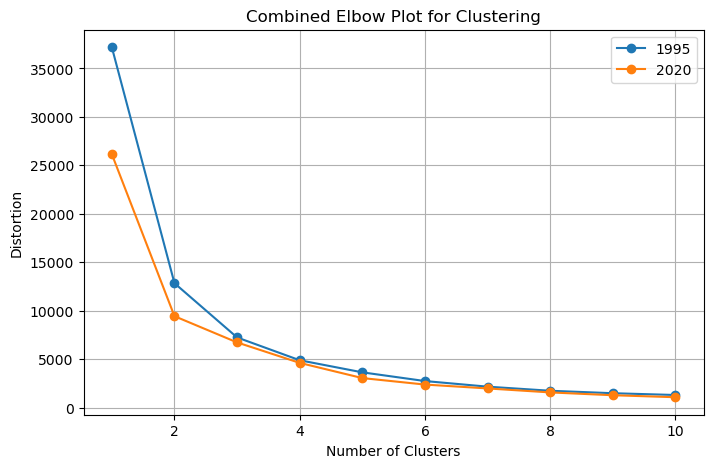

C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aswini\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

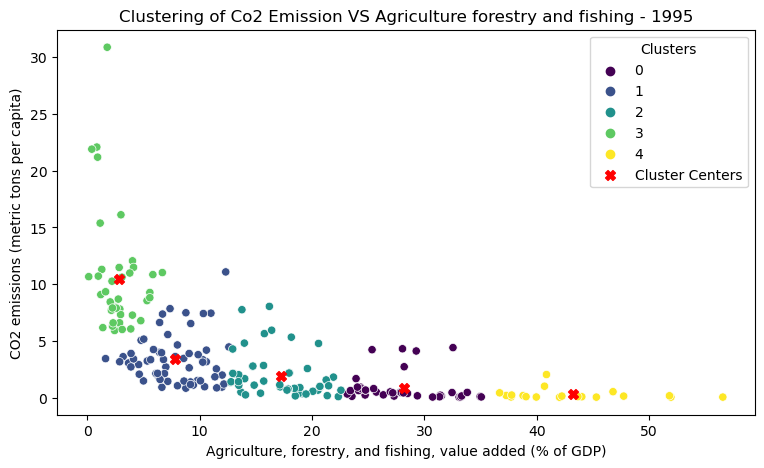

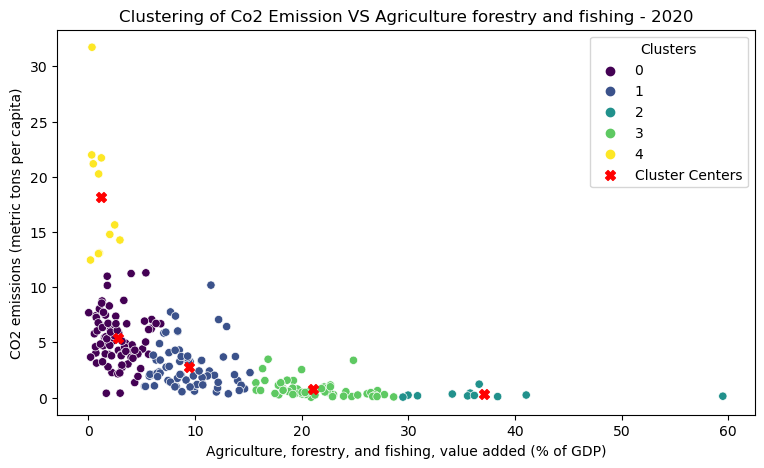

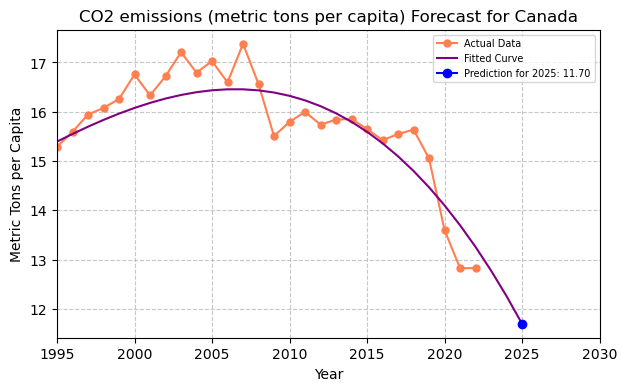

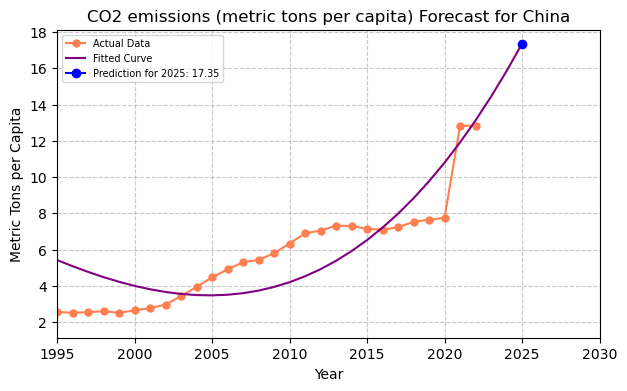

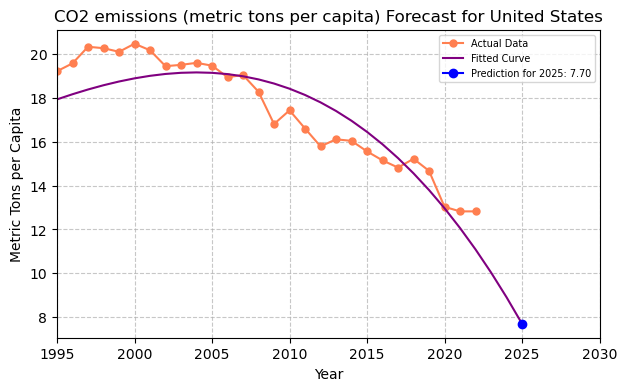

In [11]:
import pandas as pd #Importing pandas for handling and manipulating data 
import matplotlib.pyplot as plt #Importing matplotlib for Data Visualisation
from sklearn.cluster import KMeans 
                         #Importing sklearn for performing KMeans clustering
from sklearn.preprocessing import PolynomialFeatures
        #Importing sklearn For transforming features using polynomial degrees
from sklearn.linear_model import LinearRegression
        #Importing sklearn for building linear regression models
import seaborn as sns #Importing the seaborn for statistical data visualization

def read_and_filter_data(df, indicator1, indicator2, year):
   
    """
    Reads a DataFrame and filters it based on two indicators and a specific 
    year.

    Parameters:
    - df (DataFrame): Input DataFrame containing data with 'Country Name', 
    'Indicator Name', and specified year columns.
    - indicator1 : Name of the first indicator to filter data by.
    - indicator2 : Name of the second indicator to filter data by.
    - year : Year to extract data for.

    """
    
    # Filter data for the first indicator and select relevant columns
    df1 = df[df['Indicator Name'] == 
        indicator1][['Country Name', year]].rename(columns={year: indicator1})
    
    # Filter data for the second indicator and select relevant columns
    df2 = df[df['Indicator Name'] == 
        indicator2][['Country Name', year]].rename(columns={year: indicator2})

    # Merge dataframes on 'Country Name'
    mergedata = pd.merge(df1, df2, 
                         on='Country Name', how='outer').reset_index(drop=True)

    # Drop rows with any NaN values
    drop_data = mergedata.dropna(how='any').reset_index(drop=True)

    return drop_data

def create_combined_elbow_plot(data1, data2, indicator1, indicator2):
    
    """
    Creates a combined elbow plot for KMeans clustering on two datasets with 
    specified indicators.

    Parameters:
    - data1 (DataFrame): First dataset containing relevant features for 
    clustering.
    - data2 (DataFrame): Second dataset containing relevant features for 
    clustering.
    - indicator1 (str): Name of the first indicator used for clustering.
    - indicator2 (str): Name of the second indicator used for clustering.
    
    """
    # Select the features for clustering
    features1 = data1[[indicator1, indicator2]]
    features2 = data2[[indicator1, indicator2]]

    '''Perform KMeans clustering with different numbers of clusters for 
    both dataframes'''
    
    distortions1 = []
    distortions2 = []

    # Iterate through different numbers of clusters (from 1 to 10)
    for i in range(1, 11):
        
        # Initialize and fit KMeans clustering for the first dataset
        kmeans1 = KMeans(n_clusters=i, random_state=42)
        kmeans1.fit(features1)
        
        # Append the inertia to the distortions list for the first dataset
        distortions1.append(kmeans1.inertia_)

        # Initialize and fit KMeans clustering for the second dataset
        kmeans2 = KMeans(n_clusters=i, random_state=42)
        kmeans2.fit(features2)
        
        # Append the inertia to the distortions list for the second dataset
        distortions2.append(kmeans2.inertia_)

    # Plot the combined elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), distortions1, marker='o', label='1995')
    plt.plot(range(1, 11), distortions2, marker='o', label='2020')

    plt.title('Combined Elbow Plot for Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.legend()
    plt.grid(True)
    plt.show()

def kmeans_cluster_plot(data, indicator1, indicator2, n_clusters, plot_title):
    
    """
    Performs KMeans clustering on specified indicators in the given DataFrame 
    and visualizes the clusters.

    Parameters:
    - data (DataFrame): Input DataFrame containing relevant data for clustering.
    - indicator1 (str): Name of the first indicator for clustering along the 
    x-axis.
    - indicator2 (str): Name of the second indicator for clustering along the 
    y-axis.
    - n_clusters (int): Number of clusters to form.
    - plot_title (str): Title for the cluster plot.

    """
    
    # Select the features for clustering
    features = data[[indicator1, indicator2]]

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)

    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Visualize the clusters and centers
    plt.figure(figsize=(9, 5))

    # Scatter plot for data points
    scatter_points = sns.scatterplot(x=indicator1, y=indicator2, hue='Cluster', 
                                data=data, palette='viridis', legend='full')

    # Scatter plot for cluster centers
    scatter_centers = plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
                                  marker='X', s=50, c='red')

    # Create custom legend entries for cluster centers with 'X' symbols
    legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
    legend_labels.append('Cluster Centers')

    # Get the handles and labels for the legend
    handles, labels = scatter_points.get_legend_handles_labels()

    # Add the handles and labels for the cluster centers only once
    handles.append(scatter_centers)
    labels.append('Cluster Centers')

    # Enhance legend with a separate entry for cluster centers
    plt.legend(title='Clusters', handles=handles, labels=labels, 
                                                           loc='upper right')

    # Set plot details
    plt.title(plot_title)
    plt.xlabel(indicator1)
    plt.ylabel(indicator2)
    
    # Save the plot as an image file
    plt.savefig(f'{plot_title.replace(" ", "_")}_Clusterplot.png')
    
def plot_forecast(data, selected_countries, indicator_name, degree=3):
    
    """
    Generates and saves forecast plots for a specified indicator using 
    polynomial regression.

    Parameters:
    - data (DataFrame): Input DataFrame containing historical data for multiple 
    countries and indicators.
    - selected_countries (list): List of countries for which forecasts will be 
    generated.
    - indicator_name (str): Name of the indicator for which the forecast will 
    be generated.
    - degree (int, optional): Degree of the polynomial regression model 
    (default is 3).

    Returns:
    - None: Saves forecast plots for each selected country in the current 
    working directory.
    
    """
    # Filter the data
    data_selected = data[(data['Country Name'].isin(selected_countries)) & 
            (data['Indicator Name'] == indicator_name)].reset_index(drop=True)

    # Melt the DataFrame
    data_forecast = pd.melt(data_selected, id_vars=
    ['Country Name', 'Indicator Name'], var_name='Year', value_name='Value')

    # Filter out non-numeric values in 'Year' column and convert to integers
    data_forecast = data_forecast[data_forecast['Year'].str.isnumeric()]
    data_forecast['Year'] = data_forecast['Year'].astype(int)

    # Handle NaN values by filling with the mean value
    data_forecast['Value'].fillna(data_forecast['Value'].mean(), inplace=True)

    # Extend the range of years to include 2027
    all_years_extended = list(range(1995, 2027))

    for country in selected_countries:
        plt.figure(figsize=(7, 4))

        # Plot actual data
        country_data = data_forecast[data_forecast['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Value'], marker='o', 
                             markersize=5, linestyle='-', label=f'Actual Data', 
                             color='coral')

        # Fit polynomial regression model with specified degree
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(country_data[['Year']])

        model = LinearRegression()
        model.fit(X_poly, country_data['Value'])

        # Predict values for all years up to 2025
        X_pred = poly_features.transform(pd.DataFrame(all_years_extended, 
                                                      columns=['Year']))
        forecast_values = model.predict(X_pred)

        # Plot the fitted curve only up to the prediction year
        prediction_year = 2025
        plt.plot(all_years_extended[:prediction_year - 1995 + 1], 
                        forecast_values[:prediction_year - 1995 + 1], 
                        label=f'Fitted Curve', linestyle='-', color='purple')

        # Plot forecast for 2025
        prediction_2025_index = prediction_year - 1995  
        # Adjusted index for the year 2025
        
        
        prediction_2025 = forecast_values[prediction_2025_index]
        plt.plot(2025, prediction_2025, marker='o', markersize=6, 
            label=f'Prediction for 2025: {prediction_2025:.2f}', color='blue')

        # Set plot details
        plt.title(f'{indicator_name} Forecast for {country}', fontsize=12)
        plt.xlabel('Year', fontsize=10)
        plt.ylabel('Metric Tons per Capita', fontsize=10)
        plt.xlim(1995, 2030)
        plt.xticks(range(1995, 2031, 5))
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=7)

        # Save the plot
        filename = f"{indicator_name}_Forecast_{country.replace(' ', '_')}.png"
        plt.savefig(filename, bbox_inches='tight')

# Read the data only once
file_path = 'API_19_DS2_en_csv_v2_6300757.csv'
df = pd.read_csv(file_path, skiprows=3)

# Read and filter data for the year 1995
df1 = read_and_filter_data(df, 
                'Agriculture, forestry, and fishing, value added (% of GDP)', 
                'CO2 emissions (metric tons per capita)', '1995')

# Read and filter data for the year 2020
df2 = read_and_filter_data(df, 
                'Agriculture, forestry, and fishing, value added (% of GDP)', 
                'CO2 emissions (metric tons per capita)', '2020')

# Create a combined elbow plot for KMeans clustering on both datasets
create_combined_elbow_plot(df1, df2, 
                'Agriculture, forestry, and fishing, value added (% of GDP)',
                'CO2 emissions (metric tons per capita)')

# Perform KMeans clustering and plot for the year 1995
kmeans_cluster_plot(df1, 
                'Agriculture, forestry, and fishing, value added (% of GDP)', 
    'CO2 emissions (metric tons per capita)', n_clusters=5, plot_title=
    'Clustering of Co2 Emission VS Agriculture forestry and fishing - 1995')

# Perform KMeans clustering and plot for the year 2020
kmeans_cluster_plot(df2, 
                'Agriculture, forestry, and fishing, value added (% of GDP)', 
    'CO2 emissions (metric tons per capita)', n_clusters=5, plot_title=
    'Clustering of Co2 Emission VS Agriculture forestry and fishing - 2020')

# Generate and save forecast plots for selected countries and CO2 emissions
plot_forecast(df,['Canada', 'China', 'United States'], 
                          'CO2 emissions (metric tons per capita)', degree=3)
